<a href="https://colab.research.google.com/github/Lolo-17/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Chi2_Tests_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Practice Chi^2 Tests

Use the following dataset relating to math scores of students in two different Portugese schools:

<https://archive.ics.uci.edu/ml/datasets/Student+Performance>

### 1) Load the dataset specifically relating to math scores as a new dataframe.

There are two datasets in the `student.zip` file, make sure you use `student-mat.csv`.


In [5]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
# Getting the data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

In [ ]:
# Unzipping the data to read the file
!unzip student.zip

In [ ]:
# Saving a csv file to a variable and looking at the first 10 rows
df = pd.read_csv('student-mat.csv', sep=';')
print(df.shape)
df.head(10)

In [ ]:
# Describing the dataframe
df.describe()

### 2) Use Chi^2 tests and `stats.chi2_contingency()` to identify:
 - Two pairs of variables that are dependent (are associated with one another).
 - Two pairs of variables that are independent (have no significant relationship).

Does it make intuitive sense why the variables in these pairs might or might not show a relationship to one another? 


## **Testing variables that are dependent**

### Null Hypothesis:

The two categorical variables are independent.

### Alternative Hypothesis:

The two categorical varaibles are dependent.

### Confidence Level: 95%

In [15]:
# First categorical column
df['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [18]:
# Second categorical column
df['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

In [24]:
# Showing a sample of failures and internet 
test1 = pd.crosstab(df['failures'], df['internet'])
test1

internet,no,yes
failures,,
0,47,265
1,13,37
2,2,15
3,4,12


In [25]:
# Unpacking the variables
chi2, p_value, dof, expected_frequency = stats.chi2_contingency(test1)
print('Chi2:', chi2)
print('P-value:', p_value)
print('DoF:', dof)
print('Expected Frequency: \n', expected_frequency)

Chi2: 4.796825454131461
P-value: 0.18729362004759023
DoF: 3
Expected Frequency: 
 [[ 52.13164557 259.86835443]
 [  8.35443038  41.64556962]
 [  2.84050633  14.15949367]
 [  2.67341772  13.32658228]]


### **Conclusion:**

Based on a chi statistic of 4.79 and a p-value of .18. I **reject** 

the null hypothesis and claim the two categories are dependent.

**P-Value >= .18**

## **Testing variables that are independent**

### Null Hypothesis:

The two categorical variables are independent.

### Alternative Hypothesis:

The two categorical varaibles are dependent.

### Confidence Level: 95%

In [27]:
# First categorical column
df['traveltime'].value_counts()

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64

In [28]:
# Second categorical column
df['failures'].value_counts()

0    312
1     50
2     17
3     16
Name: failures, dtype: int64

In [29]:
# Showing a sample of failures and traveltime  
test2 = pd.crosstab(df['failures'], df['traveltime'])
test2

traveltime,1,2,3,4
failures,,,,
0,209,80,17,6
1,30,17,3,0
2,7,9,1,0
3,11,1,2,2


In [30]:
# Unpacking the variables
chi2, p_value, dof, expected_frequency = stats.chi2_contingency(test2)
print('Chi2:', chi2)
print('P-value:', p_value)
print('DoF:', dof)
print('Expected Frequency: \n', expected_frequency)

Chi2: 21.124872298979817
P-value: 0.012107363244231761
DoF: 9
Expected Frequency: 
 [[202.99746835  84.5164557   18.16708861   6.31898734]
 [ 32.53164557  13.5443038    2.91139241   1.01265823]
 [ 11.06075949   4.60506329   0.98987342   0.3443038 ]
 [ 10.41012658   4.33417722   0.93164557   0.32405063]]


### **Conclusion:**

Based on a chi statistic of 21.12 and a p-value of .012. I **fail to reject**

the null hypothesis and claim the two categories are dependent.

**P-Value < .012**

### 3) Use NumPy to perform your own chi^2 test "from scratch" 

Pick any of the chi^2 tests that you ran in part 2 and try them on your own. You should get the same results that Scipy got for all four values returned from `chi2_contingency()`

In [79]:
# Showing a sample of failures and internet
# to get chi stat and p value by hand
test3 = pd.crosstab(df['failures'], df['traveltime'])
test3

traveltime,1,2,3,4
failures,,,,
0,209,80,17,6
1,30,17,3,0
2,7,9,1,0
3,11,1,2,2


In [80]:
# Just confirming some values from failures and traveltime array
print(312 * 257 / 395)
print(50 * 107 / 395)
print(17 * 23 / 395)
print(16 * 8 / 395)

202.99746835443037
13.544303797468354
0.9898734177215189
0.3240506329113924


In [81]:
# Taking row totals for failures
row_total = df['failures'].value_counts().values
row_total

array([312,  50,  17,  16])

In [82]:
# Taking column totals for traveltime
col_total = df['traveltime'].value_counts().values
col_total

array([257, 107,  23,   8])

In [83]:
# Getting the total of the array
test3_size = df.shape[0]
test3_size

395

In [84]:
# Creating a numpy array and filling them with frequencies
expected = np.array([[0.0,0.0,0.0,0.0],
                    [0.0,0.0,0.0,0.0],
                    [0.0,0.0,0.0,0.0],
                    [0.0,0.0,0.0,0.0]])

for row_index, row in enumerate(row_total):
  for col_index, col in enumerate(col_total):
    expected_val = (row*col)/test3_size
    expected[row_index][col_index] = expected_val

expected

array([[202.99746835,  84.5164557 ,  18.16708861,   6.31898734],
       [ 32.53164557,  13.5443038 ,   2.91139241,   1.01265823],
       [ 11.06075949,   4.60506329,   0.98987342,   0.3443038 ],
       [ 10.41012658,   4.33417722,   0.93164557,   0.32405063]])

In [85]:
# Adding original traveltime and failures data array into observed
observed = test3.values
test3

traveltime,1,2,3,4
failures,,,,
0,209,80,17,6
1,30,17,3,0
2,7,9,1,0
3,11,1,2,2


\begin{align}
\chi^2 = \sum \frac{(observed_i-expected_i)^2}{(expected_i)}
\end{align}

In [86]:
# Calculating chi value using above equation
chi2 = ((observed - expected)**2 / expected).sum()
chi2

21.124872298979817

In [92]:
# Importing libraries to display an image
from google.colab import files
from IPython.display import Image

In [87]:
# Uploading the image from local machine
uploaded = files.upload()

Saving Annotation 2020-08-11 185258.png to Annotation 2020-08-11 185258.png


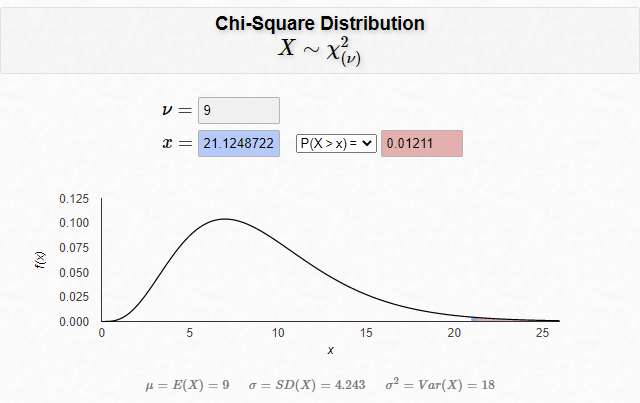

In [95]:
# Showing my image which includes the p-value
Image("Annotation 2020-08-11 185258.png", width=600)

## Stretch goals:

### 1. Refactor your code so it is elegant, readable, and holds reusable code in functions.

In [ ]:
# YOUR WORK HERE



### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics?

- What are hypothesis test? How are they useful?

- What is a "null hypothesis?"

- What is a p-value and what does it represent?

- What does it mean for something to be "statistically significant?"

- What is a test statistic and how does it relate to a p-value?

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)